<a href="https://colab.research.google.com/github/abhisheksharma712/employee-turnover-/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# statistics model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
df['children']=df['children'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int32  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 68.1+ KB


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df.corr(numeric_only=True)


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [ ]:
#sns.boxplot(df.corrwith(df['expenses']),orient='h')

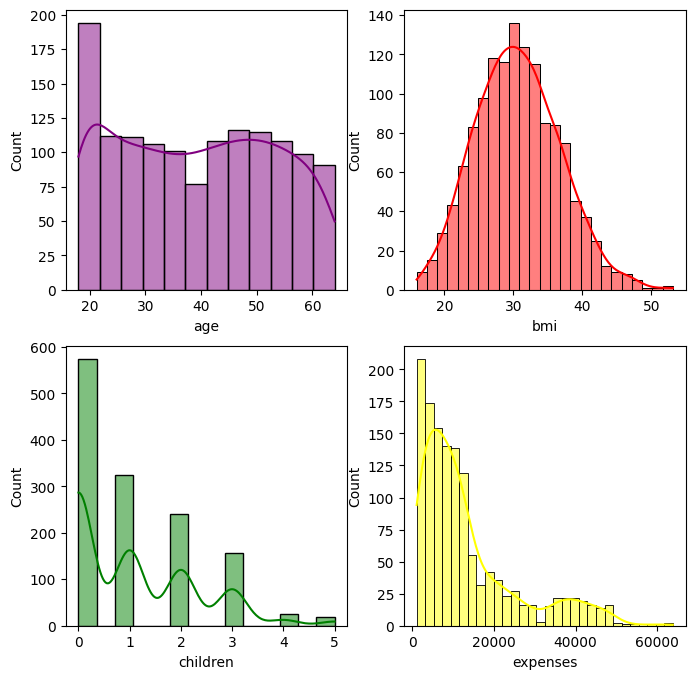

In [ ]:
# check the distribution of the numeric variable:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.histplot(data=df, x='age', kde=True, color='purple', ax=axes[0, 0])
sns.histplot(data=df, x='bmi', kde=True, color='red', ax=axes[0, 1])
sns.histplot(data=df, x='children', kde=True, color='green', ax=axes[1, 0])
sns.histplot(data=df,x='expenses',kde=True,color='yellow',ax=axes[1,1])
# Add more plots if needed
plt.show()


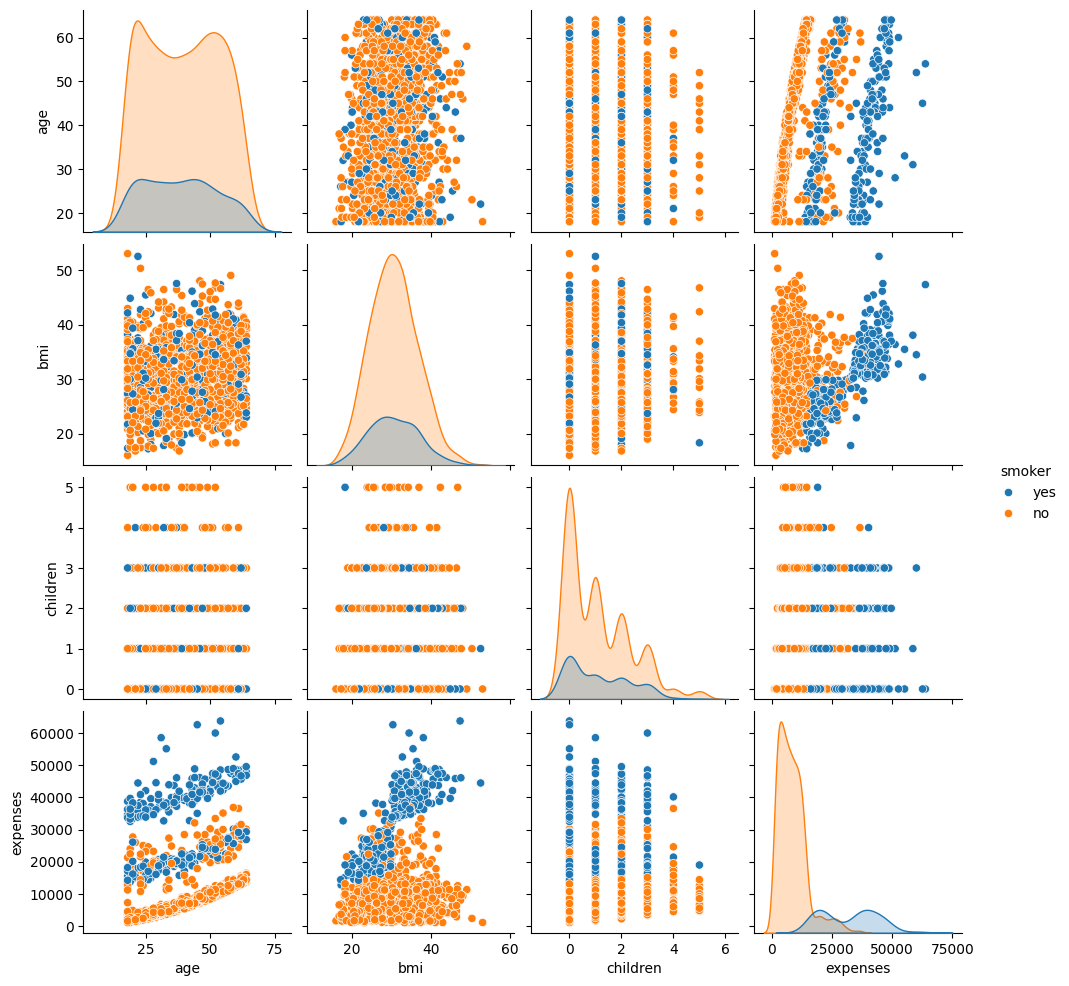

In [ ]:
# checking the impact of smoking preference on the expenses vs age and bmi and children
sns.pairplot(data=df,hue='smoker')
plt.show()

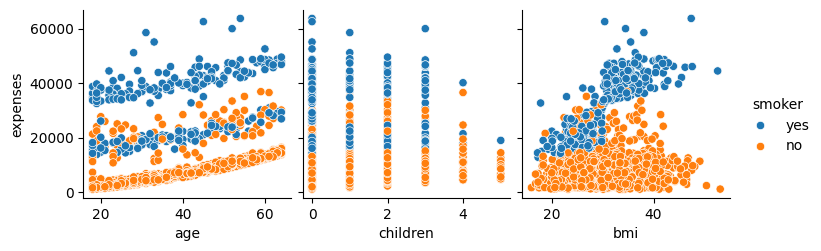

In [ ]:
sns.pairplot(df,x_vars=['age','children','bmi'],y_vars='expenses',hue='smoker',kind='scatter')
plt.show()

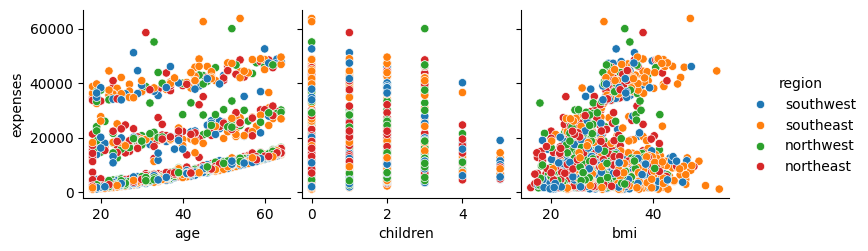

In [ ]:
sns.pairplot(df,x_vars=['age','children','bmi'],y_vars='expenses',hue='region',kind='scatter')
plt.show()

In [ ]:
df=pd.get_dummies(data=df,columns=['sex','smoker','region'],drop_first=True,dtype=int)

df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int32  
 3   expenses          1338 non-null   float64
 4   sex_male          1338 non-null   int64  
 5   smoker_yes        1338 non-null   int64  
 6   region_northwest  1338 non-null   int64  
 7   region_southeast  1338 non-null   int64  
 8   region_southwest  1338 non-null   int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 89.0 KB


In [ ]:
X=df.drop('expenses',axis=1)
y=df['expenses']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
# combining train data
train_df=pd.concat((X_train,y_train),axis=1)
train_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,expenses
144,30,28.7,3,1,1,1,0,0,20745.99
563,50,44.8,1,1,0,0,1,0,9058.73
1056,48,28.9,0,0,0,0,0,1,8277.52
487,19,28.7,0,1,0,0,0,1,1253.94
856,48,33.1,0,0,1,0,1,0,40974.16


In [ ]:
!pip install statsmodels

import statsmodels.formula.api as sm



In [ ]:
# MODEL 1:
model = sm.ols(formula='expenses ~ age + bmi + children + sex_male + smoker_yes + region_northwest + region_southeast + region_southwest', data=train_df).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     428.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:45:49   Log-Likelihood:                -10811.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1061   BIC:                         2.168e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.181e+04   1063.215    -11.109      0.000   -1.39e+04   -9725.413
age                255.4680     13.043     19.586      0.000     229.874     281.062
bmi                324.9690     30.735     10.573      0.000     264.661     385.277
children           495.7622    150.158      3.302      0.001     201.121     790.403
sex_male           124.8186    364.286      0.343      0.732    -589.984     839.621
smoker_yes        2.396e+04    452.887     52.904      0.000    2.31e+04    2.48e+04
region_northwest  -330.1669    518.457     -0.637      0.524   -1347.485     687.151
region_southeast  -812.6671    519.182     -1.565      0.118   -1831.407     206.073
region_southwest -1092.5267    527.965     -2.069      0.039   -2128.500     -56.553
==============================================================================
Omnibus:                      251.797   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.509
Skew:                           1.221   Prob(JB):                    4.55e-143
Kurtosis:                       5.956   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# model2
model2 = sm.ols(formula='expenses ~ age + bmi + children  + smoker_yes ', data=train_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     854.6
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:02:29   Log-Likelihood:                -10814.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1065   BIC:                         2.166e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.196e+04   1013.740    -11.795      0.000   -1.39e+04   -9967.576
age          256.0909     13.032     19.651      0.000     230.519     281.663
bmi          312.8529     29.434     10.629      0.000     255.097     370.608
children     488.5108    149.824      3.261      0.001     194.528     782.494
smoker_yes  2.398e+04    451.722     53.089      0.000    2.31e+04    2.49e+04
==============================================================================
Omnibus:                      255.152   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.789
Skew:                           1.234   Prob(JB):                    5.95e-146
Kurtosis:                       5.985   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
features=train_df[['age','bmi','children','smoker_yes']]

In [ ]:
# multicollinearty problem
# variance inflation test
# VIF<10 - no multicollienarty other wise

In [ ]:
vif_df=pd.DataFrame()

In [ ]:
vif_df

""


In [ ]:
vif_df['features']=features.columns

In [ ]:
vif_df

,features
0,age
1,bmi
2,children
3,smoker_yes


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df['vif'] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]


In [ ]:
vif_df

,features,vif
0,age,7.565046
1,bmi,8.029196
2,children,1.782206
3,smoker_yes,1.247765


In [ ]:
# so vif is less than 10 for all faeture so np multicolienarty so